In [1]:
import sys
sys.path.insert(0, '..')
# sys.path.insert(1, '../python/')
sys.path.insert(1, 'python/')

import ROOT
# import python.l1THistos as histos
import math
import uuid
import pandas as pd

import webpager as wp

from drawingTools import *

# ROOT.enableJSVis()
# ROOT.enableJSVis()

#from drawingTools import *




normalized_histos = list()

Welcome to JupyROOT 6.24/06


Info in <TCanvas::Print>: png file test.png has been created


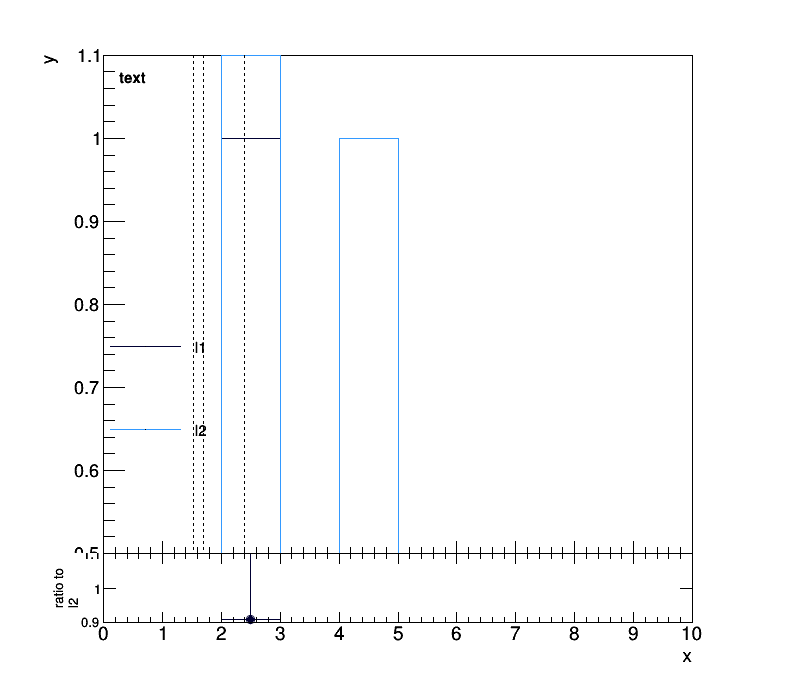

In [2]:
# %load python/drawingTools.py
# %load ./python/drawingTools.py
# %load python/drawingTools.py

from __future__ import absolute_import
from __future__ import print_function
import ROOT
import math
import uuid
import pandas as pd
import six
from six.moves import range
import array
import pprint
import webpager as wp

# some useful globals, mainly to deal with ROOT idiosyncrasies
c_idx = 0
p_idx = 0
colors = [1, 632-4, 416+1, 600-3, 616+1, 432-3]
colors.extend(list(range(1, 12)))


marker_styles = [8, 21, 22, 23, 33, 33, 33, 33, 33, 33, 33, 33]
stuff = []
f_idx = 0

ROOT.gStyle.SetOptTitle(False)
ROOT.gStyle.SetPadBottomMargin(0.13)
ROOT.gStyle.SetPadLeftMargin(0.13)
ROOT.gStyle.SetPadRightMargin(0.13)
ROOT.gStyle.SetOptStat(False)
# ROOT.gStyle.SetPalette()
# ROOT.gStyle.SetCanvasBorderMode(0)
# ROOT.gStyle.SetCanvasColor(0)


# def DrawPrelimLabel(canvas):
#     canvas.cd()
#     tex = ROOT.TLatex()
#     global stuff
#     stuff.append(tex)
#     tex.SetTextSize(0.03)
#     tex.DrawLatexNDC(0.13,0.91,"#scale[1.5]{CMS} #scale[1.]{Phase-2 Simulation}")
#     tex.DrawLatexNDC(0.49,0.91,"14TeV, 7.5#times10^{34}cm^{-2}s^{-1}, 200 PU")

#     tex.Draw("same");
#     return

def SaveCanvas(canvas, name):
    canvas.cd()
    canvas.SaveAs(name+'.pdf')


# void SaveCanvas(TCanvas* c, TString PlotName = "myPlotName")
# {
#   c->cd();
#   c->SaveAs(PlotName + ".pdf");
#   c->SaveAs(PlotName + ".root");

#   return;
# }

def getText(text, ndc_x, ndc_y):
    global stuff
    rtext = ROOT.TLatex(ndc_x, ndc_y, text)
    stuff.append(rtext)
    rtext.SetNDC(True)
    # rtext.SetTextFont(40)
    rtext.SetTextSize(0.03)
    return rtext


def getLegend(x1=0.7, y1=0.71, x2=0.95, y2=0.85):
    global stuff
    legend = ROOT.TLegend(x1, y1, x2, y2)
    stuff.append(legend)
    legend.SetFillColor(0)
    legend.SetFillStyle(0)
    legend.SetBorderSize(0)
    legend.SetTextSize(0.03)
    return legend


def newCanvas(name=None, title=None, height=600, width=800, xdiv=0, ydiv=0, form=4):
    global c_idx
    if name is None:
        name = 'c_{}'.format(uuid.uuid4().hex[:6])
        c_idx += 1
    if title is None:
        title = name
    # print name, title, width, height
    canvas = ROOT.TCanvas(name, title, width, height)
    if(xdiv*ydiv != 0):
        canvas.Divide(xdiv, ydiv)
    global stuff
    stuff.append(canvas)
    return canvas


def drawAndProfileX(plot2d, miny=None, maxy=None, do_profile=True, options='', text=None):
    global p_idx
    if miny and maxy:
        plot2d.GetYaxis().SetRangeUser(miny, maxy)
    c = newCanvas()
    c.SetGrid(1, 1)
    c.cd()
    plot2d.Draw(options)
    ROOT.gPad.SetGrid(1, 1)
    ROOT.gStyle.SetGridColor(15)

    if do_profile:
        profname = plot2d.GetName()+'_prof_'+str(p_idx)
        p_idx += 1
        firstbin = 1
        lastbin = -1
        prof = plot2d.ProfileX(profname, firstbin, lastbin, 's')
        prof.SetMarkerColor(2)
        prof.SetLineColor(2)
        prof.Draw('same')

    if text:
        rtext = getText(text, 0.15, 0.85)
        rtext.Draw('same')

    c.Draw()


class ColorPalette(object):
    def __init__(self):
        self.color_base = [
            ROOT.kBlue+4,
            ROOT.kAzure+1,
            ROOT.kViolet+5,
            ROOT.kViolet,
            ROOT.kPink-9,
            ROOT.kRed-4,
            ROOT.kOrange+1,
            ROOT.kGreen+1,
            ROOT.kYellow-3]

    def __getitem__(self, idx):
        color = 0
        if idx < len(self.color_base):
            color = self.color_base[idx]
        else:
            mod = int(idx / len(self.color_base))
            sign = 1
            if mod % 2:
                sign = -1
            index = idx-mod*len(self.color_base)
            # print (f'mod: {mod}, index: {index}, sign: color: {self.color_base[index]+sign*mod*5}')
            color = self.color_base[index]+sign*10
        # print (f'get color: {color} for idx: {idx}')
        return color


class DrawConfig(object):
    def __init__(self):
        self.do_stats = False
        self.marker_size = 0.5
        self.marker_styles = [id for id in range(20, 50)]

#         self.canvas_sizes = (800, 600)
        self.canvas_sizes = (600, 600)
        # SetMargin (Float_t left, Float_t right, Float_t bottom, Float_t top)
#         self.canvas_margins = (0.13, 0.3, 0.13, 0.1)
        self.canvas_margins = (0.13, 0.13, 0.13, 0.1)
        self.canvas_margins_div = (0.13, 0.13, 0.13, 0.1)
        self.legend_position = (0.6, 0.7)
        self.legend_size = (0.26, 0.1)
        self.additional_text = []
        self.additional_text_size = 0.03
        self.colors = ColorPalette()


tdr_config = DrawConfig()
tdr_config.additional_text.append(
    (0.13, 0.91, "scale[1.5]{CMS} scale[1.]{Phase-2 Simulation}"))
tdr_config.additional_text.append(
    (0.69, 0.91, "14TeV, 200 PU"))

rleg_config = DrawConfig()
rleg_config.canvas_sizes = (800, 600)
rleg_config.canvas_margins = (0.13, 0.3, 0.13, 0.1)
rleg_config.legend_position = (0.7, 0.71)
rleg_config.legend_size = (0.25, 0.14)


class DPSColorPalette(ColorPalette):
    def __init__(self):  
        ColorPalette.__init__(self)
        self.color_map = {
            # 'Sta': ROOT.kGreen+1,
            'Sta': ROOT.kViolet-7,
            'TkEm': ROOT.kPink-9,
            'TkEle': ROOT.kBlue+2,
            'IsoTkEle': ROOT.kAzure+1,
            'EllTkEle': ROOT.kViolet+5,
            'sig': ROOT.kAzure-9,
            'bkg': ROOT.kOrange-9,
  
        }

    def keys(self):
        return self.color_map.keys()
        
    def setPalette(self, keys):
        self.color_base = []
        for key in keys:
            self.color_base.append(self.color_map[key])


dpsconfig = DrawConfig()
dpsconfig.marker_size = 1
dpsconfig.legend_size=(0.3, 0.3)
dpsconfig.legend_position=(0.3, 0.15)
# newconfig.marker_styles.append(10)
dpsconfig.colors = DPSColorPalette()
dpsconfig.additional_text.append(
    (0.13, 0.91, "#scale[1.5]{CMS} #scale[1.]{Phase-2 Simulation Preliminary}"))
dpsconfig.additional_text.append(
    (0.69, 0.91, "14TeV, 200 PU"))


class RatioPlot(object):
    def __init__(self, id_num, h_num, id_den, h_den):
        global stuff
        self.id_num = id_num
        self.id_den = id_den
        if 'TH' in h_num.ClassName():
            self.histo = h_num.Clone()
            self.histo.Divide(h_den)
        elif 'TGraph' in h_num.ClassName():
            if h_num.GetN() != h_den.GetN():
                raise ValueError(f'[RatioPlot] num and den {h_num.ClassName()} objs have different # of points: ({h_num.GetN() } and {h_den.GetN()} resp.)')
            npoints = h_num.GetN()
            x_den_buf = h_den.GetX()
            x_den_buf.reshape((npoints,))
            x_den = array.array('d', x_den_buf)
            x_num_buf = h_den.GetX()
            x_num_buf.reshape((npoints,))
            x_num = array.array('d', x_num_buf)
            y_den_buf = h_den.GetY()
            y_den_buf.reshape((npoints,))
            y_den = array.array('d', y_den_buf)
            y_num_buf = h_num.GetY()
            y_num_buf.reshape((npoints,))
            y_num = array.array('d', y_num_buf)
            y_ratio = [1.]*npoints
            for id in range(0, npoints):
                if x_num[id] != x_den[id]:
                    raise ValueError(f'[RatioPlot] num and den {h_num.ClassName()} objs have diff. ascissa {x_num[id]} and {x_den[id]} for point {id}')
                if y_den[id] == 0:
                    if y_num[id] == 0:
                        y_ratio[id] = 1
                    else:
                        y_ratio[id] = 99999
                else:
                    y_ratio[id] = y_num[id]/y_den[id]
                # print(f'{id}: y_num: {y_num[id]} y_den: {y_den[id]}')

            self.histo = ROOT.TGraph(npoints, x_num, array.array('d', y_ratio))
            stuff.append(self.histo)


class DrawMachine(object):
    def __init__(self, config):
        global stuff
        self.config = config
        self.histos = []
        stuff.append(self.histos)
        self.labels = []
        self.overlay = True
        self.canvas = None
        self.legend = None
        self.ratio_histos = []
        return

    def addHistos(self, histograms, labels):
        for hidx, hist in enumerate(histograms):
            histo_class = hist.ClassName()
            if 'TH2' in histo_class or 'TH3' in histo_class:
                self.overlay = False

            # clone the histo
            d_hist = hist.Clone(uuid.uuid4().hex[:6])
#             if 'TGraph' in histo_class:
#                 d_hist.SetTitle(';'+';'.join(hist.GetTitle().split(';')[1:]))
#             else:
            d_hist.SetTitle(';{};{}'.format(hist.GetXaxis().GetTitle(), hist.GetYaxis().GetTitle()))
            # drop the title
            #             d_hist.SetTitle("")
            self.histos.append(d_hist)
            self.labels.append(labels[hidx])
        return

    def drawAdditionalText(self):
        tex = ROOT.TLatex()
        global stuff
        stuff.append(tex)
        tex.SetTextSize(self.config.additional_text_size)
        for txt in self.config.additional_text:
            tex.DrawLatexNDC(txt[0], txt[1], txt[2])
        tex.Draw("same")

    def formatHisto(self, hidx, hist, options=''):
        histo_class = hist.ClassName()
        hist.UseCurrentStyle()
        # print (f'format histo of class {histo_class}')
        if 'TGraph' in histo_class:
            hist.SetMarkerSize(self.config.marker_size)
            hist.SetMarkerStyle(self.config.marker_styles[hidx])
            if self.overlay:
                hist.SetMarkerColor(self.config.colors[hidx])
                hist.SetLineColor(self.config.colors[hidx])
        elif 'TH1' in histo_class:
            hist.SetLineColor(self.config.colors[hidx])
            if 'hist' not in options:
                hist.SetMarkerSize(self.config.marker_size)
                hist.SetMarkerStyle(self.config.marker_styles[hidx])
                hist.SetMarkerColor(self.config.colors[hidx])
        else:
            hist.SetStats(self.config.do_stats)
            if self.overlay:
                hist.SetLineColor(self.config.colors[hidx])

    def formatHistos(self, options):
        for hidx, hist in enumerate(self.histos):
            self.formatHisto(hidx, hist, options[hidx])

    def formatRatioHistos(self, options=''):
        for hist in self.ratio_histos:
            self.formatHisto(hist.id_num, hist.histo, options)

    def createCanvas(self, do_ratio=False):
        if self.canvas is not None:
            return

        # this list stores the id of the pad for each histogram to be plotted
        pad_ix = []

        xdiv = 0
        ydiv = 0
        c_width, c_height = self.config.canvas_sizes
        pad_ix = [1]*len(self.histos)
        if not self.overlay:
            xdiv = 2
            ydiv = math.ceil(float(len(self.histos))/2)
            c_width = 1000.
            c_height = 500*ydiv
            pad_ix = list(range(1, len(self.histos)+1))
        elif do_ratio:
            c_height = c_height*1.2
            xdiv = 1
            ydiv = 2

        self.canvas = newCanvas(name=None,
                                title=None,
                                height=int(c_height),
                                width=int(c_width),
                                xdiv=int(xdiv),
                                ydiv=int(ydiv))
        if self.overlay:
            self.canvas.SetMargin(self.config.canvas_margins[0],
                                  self.config.canvas_margins[1],
                                  self.config.canvas_margins[2],
                                  self.config.canvas_margins[3])
        else:
            self.canvas.SetMargin(self.config.canvas_margins_div[0],
                                  self.config.canvas_margins_div[1],
                                  self.config.canvas_margins_div[2],
                                  self.config.canvas_margins_div[3])

        if not do_ratio:
            self.canvas.cd()
        else:
            self.canvas.cd(1)
            ROOT.gPad.SetPad(0, 0.2, 1, 1.0)
            ROOT.gPad.SetBottomMargin(0)
            ROOT.gPad.SetFrameFillColor(0)
            ROOT.gPad.SetFrameBorderMode(0)

            self.canvas.cd(2)
            ROOT.gPad.SetPad(0, 0, 1, 0.2)
            ROOT.gPad.SetTopMargin(0)
            ROOT.gPad.SetFrameFillColor(0)
            ROOT.gPad.SetFrameBorderMode(0)
            ROOT.gPad.SetBottomMargin(0.5)
            self.canvas.cd(1)

        return pad_ix

    def createLegend(self):
        if self.legend is not None:
            return
        self.legend = getLegend(self.config.legend_position[0],
                                self.config.legend_position[1],
                                self.config.legend_position[0]+self.config.legend_size[0],
                                self.config.legend_position[1]+self.config.legend_size[1])
        for hidx, hist in enumerate(self.histos):
            histo_class = hist.ClassName()
            if 'TGraph' not in histo_class:
                self.legend.AddEntry(hist, self.labels[hidx], 'lP')
            else:
                self.legend.AddEntry(hist, self.labels[hidx], 'P')

    def addRatioHisto(self, id_num, id_den):
        if len(self.ratio_histos) != 0:
            if id_den not in [rh.id_den for rh in self.ratio_histos]:
                print(f'***Warning: ratio histo can not be added, since id_den: {id_den} != from existing ratio plots!')
                return
        try:
            ratio = RatioPlot(id_num, self.histos[id_num], id_den, self.histos[id_den])
            self.ratio_histos.append(ratio)
        except Exception as inst:
            print(f"***Warning: Ratio plot can not be added: {str(inst)}")

    def draw(self,
             text,
             options='',
             norm=False,
             y_log=False,
             x_log=False,
             y_min=None,
             y_max=None,
             x_min=None,
             x_max=None,
             y_axis_label=None,
             x_axis_label=None,
             v_lines=None,
             h_lines=None,
             do_profile=False,
             do_ratio=False,
             y_min_ratio=0.7,
             y_max_ratio=1.3,
             h_lines_ratio=[0.9, 1.1],
             y_axis_label_ratio=None,
             ratio_histos_manipulator=None,
             histos_manipulator=None):

        global p_idx
        global stuff

        if len(self.ratio_histos) == 0:
            do_ratio = False

        opt = options
        if type(options) != list:
            opt = [options]*len(self.histos)

        self.formatHistos(opt)
        pad_idx = self.createCanvas(do_ratio=do_ratio)
        if self.overlay:
            self.createLegend()

        drawn_histos = self.drawHistos(pad_idx, self.histos, text, opt, norm, do_profile)

        self.formatAxis(drawn_histos, y_min, y_max, x_min, x_max, y_axis_label, x_axis_label)
        if histos_manipulator:
            histos_manipulator(drawn_histos)

        if self.legend is not None and len(self.histos) > 1:
            self.legend.Draw("same")

        self.drawText(pad_idx, text)
        # self.canvas.Update()
        self.drawLines(pad_idx, y_log, x_log, v_lines, h_lines)
        # ROOT.gPad.Draw()

 
        if do_ratio:
            ROOT.gROOT.ForceStyle()
            r_y_axis_label = f'#splitline{{ratio to}}{{{self.labels[self.ratio_histos[0].id_den]}}}'
            if y_axis_label_ratio is not None:
                r_y_axis_label = y_axis_label_ratio
            # r_y_axis_label = '#splitline{{ratio}}{{#scale[0.5]{{to {}}}}}'.format(
                # self.labels[self.ratio_histos[0].id_den])
            r_pad_idx = [2]*len(self.ratio_histos)
            self.formatRatioHistos()
            r_drawn_histos = self.drawHistos(
                r_pad_idx, 
                [rh.histo for rh in self.ratio_histos], 
                text='', options=['']*len(self.ratio_histos), norm=False, do_profile=False)
            self.formatAxis(
                r_drawn_histos, 
                y_min_ratio, y_max_ratio, 
                x_min, x_max, 
                r_y_axis_label, x_axis_label=drawn_histos[0].GetXaxis().GetTitle())
            self.canvas.Update()
            for hist in r_drawn_histos:
                ROOT.gPad.SetTicks(1,1)
                hist.GetXaxis().SetTitleSize(0.15)
                hist.GetXaxis().SetTitleOffset(1)
                hist.GetXaxis().SetTickLength(0.1)
                hist.GetYaxis().CenterTitle()
                hist.GetYaxis().SetTitleSize(0.1)
                hist.GetXaxis().SetLabelSize(0.15)
                hist.GetYaxis().SetTitleOffset(0.3)
                hist.GetYaxis().SetNdivisions(2)
                hist.GetYaxis().SetLabelSize(0.1)

            if ratio_histos_manipulator:
                ratio_histos_manipulator(r_drawn_histos)

            self.canvas.Update()

            self.drawLines(r_pad_idx, y_log=False, x_log=False, v_lines=[], h_lines=h_lines_ratio)

        self.canvas.Draw()
        return

    def drawLines(self, pad_idx, y_log, x_log, v_lines, h_lines):
        self.canvas.Update()
        x_axis_min = ROOT.gPad.GetUxmin()
        x_axis_max = ROOT.gPad.GetUxmax()
        y_axis_min = ROOT.gPad.GetUymin()
        y_axis_max = ROOT.gPad.GetUymax()
        
        for pad_id in pad_idx:
            self.canvas.cd(pad_id)
            if v_lines:
                for v_line_x in v_lines:
                    if v_line_x <= x_axis_min or v_line_x >= x_axis_max:
                        continue
                    aline = ROOT.TLine(v_line_x, y_axis_min, v_line_x,  y_axis_max)
                    aline.SetLineStyle(2)
                    aline.Draw("same")
                    stuff.append(aline)
            if h_lines:
                for h_line_y in h_lines:
                    if h_line_y <= y_axis_min or h_line_y >= y_axis_max:
                        continue
                    aline = ROOT.TLine(x_axis_min, h_line_y, x_axis_max,  h_line_y)
                    aline.SetLineStyle(2)
                    aline.Draw("same")
                    stuff.append(aline)
            if y_log:
                ROOT.gPad.SetLogy()
            if x_log:
                ROOT.gPad.SetLogx()
            ROOT.gPad.Update()

    def drawText(self, pad_idx, text):
        if self.overlay:
            self.canvas.cd(pad_idx[0])
            if text:
                rtext = getText(text, 0.15, 0.85)
                rtext.Draw("same")
            self.drawAdditionalText()
        else:
            if text:
                for hid,pid in enumerate(pad_idx):
                    self.canvas.cd(pid)
                    newtext = '{}: {}'.format(self.labels[hid], text)
                    rtext = getText(newtext, 0.15, 0.85)
                    rtext.Draw('same')
                    self.drawAdditionalText()

       

    def drawHistos(self, pad_idx, histos, text, options, norm, do_profile):
        drawn_histos = []
        for hidx, hist in enumerate(histos):
            opt = options[hidx]
            histo_class = hist.ClassName()
            if 'TGraph' in histo_class:
                opt = 'P'+opt
                if not hidx:
                    opt = opt+'A'
            else:
                if self.overlay and hidx:
                    opt = 'same'+opt

            self.canvas.cd(pad_idx[hidx])    
            d_hist = hist
            if norm:
                d_hist = hist.DrawNormalized(opt, 1.)
            else:
                d_hist.Draw(opt)

            if do_profile:
                p_idx += 1
                prof = d_hist.ProfileX(d_hist.GetName()+'_prof_'+str(p_idx),
                                       1, -1, 's')
                prof.SetMarkerColor(2)
                prof.SetLineColor(2)
                prof.Draw('same')

            drawn_histos.append(d_hist)
        return drawn_histos

    def formatAxis(self, drawn_histos, y_min, y_max, x_min, x_max, y_axis_label, x_axis_label):
        # we now set the axis properties
        y_min_value = y_min
        y_max_value = y_max

        if y_min is None:
            y_min_value = min([hist.GetBinContent(hist.GetMinimumBin()) for hist in drawn_histos if 'TGraph' not in hist.ClassName() and 'TF1' not in hist.ClassName()] +
                                [min(hist.GetY()) for hist in drawn_histos if 'TGraph' in hist.ClassName() and 'TF1' not in hist.ClassName()])
        if y_max is None:
            y_max_value = max([hist.GetBinContent(hist.GetMaximumBin()) for hist in drawn_histos if 'TGraph' not in hist.ClassName() and 'TF1' not in hist.ClassName()] +
                                [max(hist.GetY()) for hist in drawn_histos if 'TGraph' in hist.ClassName() and 'TF1' not in hist.ClassName()])*1.2

        for hist in drawn_histos:
            hist.GetXaxis().SetTitleOffset(1.4)
            hist.GetYaxis().SetRangeUser(y_min_value, y_max_value)
            if y_axis_label:
                hist.GetYaxis().SetTitle(y_axis_label)
            if x_axis_label:
                hist.GetXaxis().SetTitle(x_axis_label)
            if x_min is not None and x_max is not None:
                if 'TGraph' not in hist.ClassName():
                    hist.GetXaxis().SetRangeUser(x_min, x_max)
                else:
                    hist.GetXaxis().SetLimits(x_min, x_max)

    def write(self, name, ext='pdf'):
        self.canvas.SaveAs('{}.{}'.format(name, ext))
        return

    def toWeb(self, name, page_creator=None):
        if page_creator:
            page_creator.add(name, self.canvas)


def draw(histograms,
         labels,
         options='',
         norm=False,
         logy=False,
         min_y=None,
         max_y=None,
         min_x=None,
         max_x=None,
         text=None,
         y_axis_label=None,
         x_axis_label=None,
         v_lines=None,
         h_lines=None,
         do_stats=False,
         do_profile=False,
         do_ratio=False,
         do_write=False,
         write_name=None,
         legend_position=None):
    ROOT.gStyle.SetOptStat(False)

    config = rleg_config
    if do_write:
        config = tdr_config
    if do_stats:
        config.do_stats = do_stats
    if legend_position is not None:
        config.legend_position = (legend_position[0],
                                  legend_position[1])
        config.legend_size = (legend_position[2]-legend_position[0],
                              legend_position[3]-legend_position[1])

    dm = DrawMachine(config)
    dm.addHistos(histograms, labels)
    dm.draw(text=text,
            options=options,
            norm=norm,
            y_log=logy,
            y_min=min_y,
            y_max=max_y,
            x_min=min_x,
            x_max=max_x,
            y_axis_label=y_axis_label,
            x_axis_label=x_axis_label,
            v_lines=v_lines,
            h_lines=h_lines,
            do_profile=do_profile,
            # do_ratio=False,
            )
    if do_write:
        dm.write(name=write_name)
    return dm


files = {}
file_keys = {}


class HistoFile():
    def __init__(self, name, pu, version=None, type=None, label=None, path='../plots'):
        self.name = name
        self.pu = pu
        self.label = label
        self.version = version

        if version:
            version = '_'+version
        else:
            version = ''
        self.histo_filename = '{}/histos_{}{}.root'.format(path, self.name, version)
        self.histo_file = None
        self.type = type
        self.oldStyle = False

    def __repr__(self):
        return '<{} {}, {}>'.format(self.__class__.__name__, self.histo_filename, self.type)

    def open_file(self):
        if self.histo_file is None:
            self.histo_file = ROOT.TFile(self.histo_filename, 'r')

    def build_file_primitive_index_oldStyle(self):
        # FIXME: this is really hugly
        composite_classes = {('GenParticleHistos', 'h_effNum_'): 'HistoSetEff',
                             ('GenParticleHistos', 'h_effDen_'): 'HistoSetEff',
                             ('TCHistos', 'h_tc_'): 'HistoSetClusters',
                             ('ClusterHistos', 'h_cl2d_'): 'HistoSetClusters',
                             ('Cluster3DHistos', 'h_cl3d_'): 'HistoSetClusters'}
        self.open_file()
        self.histo_file.cd()
        data_list = []
        classtype = 'CalibrationHistos'
        print('--- {}'.format(classtype))
        print('# of plots: {}'.format(len(self.histo_file.GetListOfKeys())))
        # same primitives (tp, tp_sel, gen_sel) applies to several entries
        key_set = set()
        for histo in self.histo_file.GetListOfKeys():
            # print histo.GetName()
            name_parts = histo.GetName().split('_')
            cltype, tp, tp_sel, gen_sel = None, None, None, None
            if len(name_parts) == 4:
                cltype, tp, tp_sel, gen_sel = classtype, name_parts[0], name_parts[1], name_parts[2]
            else:
                # this is a histo in a HistoSet class.. we need to handle this differently
                composite_class = composite_classes[(classtype, '{}_{}_'.format(name_parts[0], name_parts[1]))]
                cltype, tp, tp_sel, gen_sel = composite_class, name_parts[2], name_parts[3], name_parts[4]
            key_set.add((cltype, tp, tp_sel, gen_sel))
        print('# of primitives: {}'.format(len(key_set)))
        for cltype, tp, tp_sel, gen_sel in key_set:
            data_list.append({'classtype': cltype,
                              'tp': tp,
                              'tp_sel': tp_sel,
                              'gen_sel': gen_sel})

        return pd.DataFrame(data_list)

    def build_file_primitive_index(self, debug=True):
        if self.oldStyle:
            print('This is old style')
            return self.build_file_primitive_index_oldStyle()
        # FIXME: this is really hugly
        composite_classes = {('GenParticleHistos', 'h_effNum_'): 'HistoSetEff',
                             ('GenParticleHistos', 'h_effDen_'): 'HistoSetEff',
                             ('TCHistos', 'h_tc_'): 'HistoSetClusters',
                             ('ClusterHistos', 'h_cl2d_'): 'HistoSetClusters',
                             ('Cluster3DHistos', 'h_cl3d_'): 'HistoSetClusters',
                             ('ResoHistos', 'h_reso_'): 'ResoHistos'}

        self.open_file()
        self.histo_file.cd()
        data_list = []
        for key in self.histo_file.GetListOfKeys():
            # first level is classtype
            classtype = key.GetName()
            if(debug):
                print('--- {}'.format(classtype))
            if key.GetClassName() != 'TDirectoryFile':
                continue
            file_dir = self.histo_file.GetDirectory(key.GetName())
            if(debug):
                print('# of plots: {}'.format(len(file_dir.GetListOfKeys())))
            # same primitives (tp, tp_sel, gen_sel) applies to several entries
            key_set = set()
            for histo in file_dir.GetListOfKeys():
                # print(histo.GetName())
                name_parts = histo.GetName().split('_')
                cltype, tp, tp_sel, gen_sel = None, None, None, None
                if len(name_parts) == 3:
                    cltype, tp, tp_sel, gen_sel = classtype, name_parts[0], name_parts[1], None
                elif len(name_parts) == 4:
                    cltype, tp, tp_sel, gen_sel = classtype, name_parts[0], name_parts[1], name_parts[2]
                else:
                    # this is a histo in a HistoSet class.. we need to handle this differently
                    composite_class = composite_classes[(classtype, '{}_{}_'.format(name_parts[0], name_parts[1]))]
                    cltype, tp, tp_sel, gen_sel = composite_class, name_parts[2], name_parts[3], name_parts[4]
                key_set.add((cltype, tp, tp_sel, gen_sel))
            if(debug):
                print('# of primitives: {}'.format(len(key_set)))
            for cltype, tp, tp_sel, gen_sel in key_set:
                data_list.append({'classtype': cltype,
                                  'tp': tp,
                                  'tp_sel': tp_sel,
                                  'gen_sel': gen_sel})

        return pd.DataFrame(data_list)

    def print_file_primitive_index(self):
        primitive_index = self.build_file_primitive_index()
        classtypes = primitive_index.classtype.unique()
        for classtype in classtypes:
            print('- HistoClass: {}'.format(classtype))
            tps = primitive_index[primitive_index.classtype == classtype].tp.unique()
            for tp in tps:
                print('  - TP: {}'.format(tp))
                tp_sels = primitive_index[(primitive_index.classtype == classtype) &
                                          (primitive_index.tp == tp)].tp_sel.unique()
                for tp_sel in tp_sels:
                    gen_sels = primitive_index[(primitive_index.classtype == classtype) &
                                               (primitive_index.tp == tp) &
                                               (primitive_index.tp_sel == tp_sel)].gen_sel.unique()
                    print('    - TP SEL: {} -> GEN SEL: {}'.format(tp_sel, gen_sels))

    def print_primitives(self):
        pp = pprint.PrettyPrinter(indent=4)

        print(self)

        primitive_index = self.build_file_primitive_index(debug=False)
        classtypes = primitive_index.classtype.unique().tolist()
        print('--- HistoClass: ')
        pp.pprint(classtypes)

        tps = primitive_index.tp.unique().tolist()
        tp_select = {}
        for tp in tps:
            tp_select[tp] = primitive_index[primitive_index.tp == tp].tp_sel.unique().tolist()
        # ==== GEN selections ===============================================
        gen_select = {}
        for tp in tps:
            gen_select[tp] = primitive_index[primitive_index.tp == tp].gen_sel.unique().tolist()

        print('--- TPs: ')
        pp.pprint(tps)
        print('--- TP selections:')
        pp.pprint(tp_select)
        print('--- GEN selections:')
        pp.pprint(gen_select)


class HProxy:
    def __init__(self, classtype, tp, tp_sel, gen_sel, root_file):
        self.classtype = classtype
        self.tp = tp
        self.tp_sel = tp_sel
        self.gen_sel = gen_sel
        self.root_file = root_file
        self.instance = None

    def get(self, debug=False):
        if self.instance is None:
            name = '{}_{}_{}'.format(self.tp, self.tp_sel, self.gen_sel)
            if self.gen_sel is None:
                name = '{}_{}'.format(self.tp, self.tp_sel)
            if debug:
                print('-- HProxy:Get: {}'.format(name))
            self.instance = self.classtype(
                name=name, 
                root_file=self.root_file, 
                debug=debug)
        return self.instance


class HWrapperLazy(object):
    def __init__(self, histo):
        self.histo = histo
        self.data_df = None
        self.filled = False

    def fill_df(self, data):
        self.data_df = data.copy()

    def get(self, debug=False):
        if not self.filled:
            print('Wrapper: {} not filled!'.format(self))
            self.histo.fill(self.data_df)
            self.filled = True
        return self.histo


class HWrapper(object):
    def __init__(self, histo):
        self.histo = histo

    def get(self, debug=False):
        return self.histo


class HPlot:
    def __init__(self, samples, labels_dict):
        self.samples_ = samples
        # reference and complete the label dict
        self.labels_dict = labels_dict
        for sample in samples:
            if sample.label is None:
                self.labels_dict[sample.type] = sample.type
            else:
                self.labels_dict[sample.type] = sample.label
        self.labels_dict.update({'PU0': 'PU0', 'PU200': 'PU200'})
        # dataframe used to store the actual data and metadata
        # histos need to be proxies or wrappers (get method to actually retrieve the root histo)
        self.data = pd.DataFrame(columns=['sample', 'pu', 'tp', 'tp_sel', 'gen_sel', 'classtype', 'histo'])

    def create_histo_proxies(self, classtype):
        for sample in self.samples_:
            histo_primtive_index = sample.build_file_primitive_index()
            if histo_primtive_index.empty:
                print('*** ERROR: No histo primitives for sample {}!'.format(sample))
                continue
            class_primitive_index = histo_primtive_index[histo_primtive_index.classtype == str(classtype).split('.')[-1].rstrip('\'>')]
            if class_primitive_index.empty:
                print('*** ERROR: No entry for class: {} in the primtive index!'.format(classtype))
                return

            for index, row in class_primitive_index.iterrows():
                newentry = pd.DataFrame(
                        [{'sample': sample.type,
                        'pu': sample.pu,
                        'tp': row.tp,
                        'tp_sel': row.tp_sel,
                        'gen_sel': row.gen_sel,
                        'classtype': classtype,
                        'histo': HProxy(classtype,
                                        row.tp,
                                        row.tp_sel,
                                        row.gen_sel,
                                        sample.histo_file)}])
                self.data = pd.concat(
                    [self.data, newentry],
                    ignore_index=True
                )

            self.data.drop_duplicates(
                subset=['sample', 'pu', 'tp', 'tp_sel', 'gen_sel', 'classtype'],
                inplace=True,
                keep='last')

    def tps(self):
        return self.data.tp.unique().tolist()

    def get_histo(self,
                  classtype,
                  sample=None,
                  pu=None,
                  tp=None,
                  tp_sel=None,
                  gen_sel=None,
                  debug=False):
        histo = None
        labels = []
        text = ''

        query = '(pu == @pu) & (tp == @tp) & (tp_sel == @tp_sel) & (classtype == @classtype)'
        rank_criteria = [('pu', pu), ('tp', tp), ('tp_sel', tp_sel)]
        if gen_sel is not None:
            query += ' & (gen_sel == @gen_sel)'
            rank_criteria.append(('gen_sel', gen_sel))
        else:
            query += ' & (gen_sel.isnull())'
        if sample is not None:
            query += '& (sample == @sample)'
            rank_criteria = [('sample', sample)] + rank_criteria
        # we want to preserve the order as in the input lists
        histo_df = self.data.query(query).copy()

        if histo_df.empty:
            print('No match found for: sample: {} pu: {}, tp: {}, tp_sel: {}, gen_sel: {}, classtype: {}'.format(
                sample, pu, tp, tp_sel, gen_sel, classtype))
            return None, None, None

        rank_list = []
        for (crit_name, crit) in rank_criteria:
            sort_list = dict(zip(crit, range(len(crit))))
            histo_df[crit_name+'_rank'] = histo_df[crit_name].map(sort_list)
            rank_list.append(crit_name+'_rank')

        histo_df.sort_values(rank_list,
                             ascending=[True]*len(rank_list),
                             inplace=True)

        for br in rank_list:
            histo_df.drop(br, axis=1, inplace=True)

        if debug:
            print(histo_df)

        field_counts = histo_df.apply(lambda x: len(x.unique()))
        label_fields = []
        text_fields = []
        # print field_counts
        for field in six.iteritems(field_counts):
            if(field[1] > 1 and field[0] != 'histo'):
                label_fields.append(field[0])
            if(field[1] == 1 and field[0] != 'histo' and field[0] != 'classtype' and field[0] != 'sample'):
                if(gen_sel is None and field[0] == 'gen_sel'):
                    continue
                text_fields.append(field[0])
#         print 'label fields: {}'.format(label_fields)
#         print 'text fields: {}'.format(text_fields)

        for item in histo_df[label_fields].iterrows():
            # print (item)
            labels.append(', '.join([self.labels_dict[tx] for tx in item[1].values if self.labels_dict[tx] != '']))

        # print labels
        text = ', '.join(
            [self.labels_dict[fl] for fl in histo_df[text_fields].iloc[0].values
                if fl in list(self.labels_dict.keys()) and self.labels_dict[fl] != ''])
        histo = [his.get(debug) for his in histo_df['histo'].values]
        return histo, labels, text


if __name__ == "__main__":
    h1 = ROOT.TH1F('h1','h1; x; y', 10, 0, 10)
    h1.Fill(2)
    h2 = ROOT.TH1F('h2','h2; x; y', 10, 0, 10)
    h2.Fill(2,1.1)

    h2.Fill(4)

    newconfig=rleg_config
    newconfig.marker_size = 1
    newconfig.legend_size=(0.5, 0.3)
    newconfig.legend_position=(0.12, 0.15)
    newconfig.marker_styles.append(10)
    dm = DrawMachine(newconfig)


    if True:
        dm.addHistos([h1,h2], labels=['l1', 'l2'])
        dm.addRatioHisto(0,1)

        dm.draw(text="text", 
                x_min=0., x_max=10, 
                y_min=0.5, y_max=1.1, 
                v_lines=[1.52, 1.7, 2.4],
            do_ratio=True,
            y_min_ratio=0.9,
            y_max_ratio=1.1,
            # x_log=True,
            options='hist'
            )
        dm.canvas.SaveAs("test.png")

    else: 
        # dm.createCanvas()
        # cc = dm.canvas

        cc = ROOT.TCanvas()
        cc.cd()
        dm.canvas = cc
        # dm.formatHistos('')
        pad_idx = [1, 1]
        dh = dm.drawHistos(pad_idx, [h1, h2], 'text', options='hist', norm=False, do_profile=False)
        # dm.histos[0].Draw()
        # dm.histos[1].Draw('same')
        # h1.Draw()
        # h2.Draw('same,')

        # dm.formatAxis(drawn_histos=dh, y_min=0, y_max=2, x_min=0, x_max=10, y_axis_label='XX', x_axis_label='YY')
        # for h in dh:
        #     print(h)
        #     print(h.GetTitle())
        cc.SaveAs("cc.png")

    # print('Enter your name:')
    # x = input()



In [3]:
# %load samples.py
import ROOT
import pandas as pd



samples = [
    HistoFile('ttbar_PU200_egplots', 'PU200', 'v160A.91Gi', 'fw', 'firmware'),
    HistoFile('ttbar_PU200_egplots', 'PU200', 'v160A.91Gi', 'emu', 'emulator'),

]


In [4]:
for hf in samples:
    hf.print_primitives()


<HistoFile ../plots/histos_ttbar_PU200_egplots_v160A.91Gi.root, fw>
--- HistoClass: 
['EGHistos']
--- TPs: 
['TkEleEE']
--- TP selections:
{'TkEleEE': ['Pt5', 'all']}
--- GEN selections:
{'TkEleEE': ['nomatch']}
<HistoFile ../plots/histos_ttbar_PU200_egplots_v160A.91Gi.root, emu>
--- HistoClass: 
['EGHistos']
--- TPs: 
['TkEleEE']
--- TP selections:
{'TkEleEE': ['Pt5', 'all']}
--- GEN selections:
{'TkEleEE': ['nomatch']}


In [5]:
import python.collections as collections
import python.selections as selections

labels_dict = {}

evm = collections.EventManager()
labels_dict.update(evm.get_labels())
selm = selections.SelectionManager()
labels_dict.update(selm.get_labels())



# #  ==== labels ===============================================
# tp_labels = histo_primitives[['data', 'data_label']].drop_duplicates().set_index('data').T.to_dict('records')[0]
# tp_selection_labels = histo_primitives[['data_sel', 'data_sel_label']].drop_duplicates().set_index('data_sel').T.to_dict('records')[0]
# gen_selection_labels = histo_primitives[['gen_sel', 'gen_sel_label']].drop_duplicates().set_index('gen_sel').T.to_dict('records')[0]






In [6]:
%%time

import python.l1THistos as histos

hplot = HPlot(samples, labels_dict)

# hplot.create_histo_proxies(histos.HistoSetEff)
hplot.create_histo_proxies(histos.EGHistos)
# hplot.create_histo_proxies(histos.TkEleHistos)
# hplot.create_histo_proxies(histos.TkEmHistos)

    
# for tp in tps:
#     hplot.cache_histo(classtype=histos.HistoSetEff, 
#                       samples=samples,
#                       pus=[],
#                       tps=[tp],
#                       tp_sels=histo_primitives[histo_primitives.data == tp].data_sel.unique(),
#                       gen_sels=gen_select[tp])



--- EGHistos
# of plots: 20
# of primitives: 2
--- EGHistos
# of plots: 20
# of primitives: 2
CPU times: user 43 ms, sys: 22.5 ms, total: 65.5 ms
Wall time: 109 ms


In [7]:
hplot.data[hplot.data.tp == 'PFtkEmEB'].gen_sel.unique()

array([], dtype=object)

In [8]:
for smp in samples:
    smp.print_primitives()


<HistoFile ../plots/histos_ttbar_PU200_egplots_v160A.91Gi.root, fw>
--- HistoClass: 
['EGHistos']
--- TPs: 
['TkEleEE']
--- TP selections:
{'TkEleEE': ['Pt5', 'all']}
--- GEN selections:
{'TkEleEE': ['nomatch']}
<HistoFile ../plots/histos_ttbar_PU200_egplots_v160A.91Gi.root, emu>
--- HistoClass: 
['EGHistos']
--- TPs: 
['TkEleEE']
--- TP selections:
{'TkEleEE': ['Pt5', 'all']}
--- GEN selections:
{'TkEleEE': ['nomatch']}


In [9]:
import os
wc = wp.WebPageCreator(
    topic_dir='fwplots', 
    project_dir='V91-CMSSW12.5-DPS', 
#     project_dir='test', 
    base_dir='/Users/cerminar/CERNbox/www/plots/', 
    tmp_dir=os.environ['TMPDIR'])

### Gen level particle distribution

In [10]:
hplot.data

,sample,pu,tp,tp_sel,gen_sel,classtype,histo
0,fw,PU200,TkEleEE,Pt5,nomatch,<class 'python.l1THistos.EGHistos'>,<__main__.HProxy object at 0x2a2539cf0>
1,fw,PU200,TkEleEE,all,nomatch,<class 'python.l1THistos.EGHistos'>,<__main__.HProxy object at 0x2a253a230>
2,emu,PU200,TkEleEE,Pt5,nomatch,<class 'python.l1THistos.EGHistos'>,<__main__.HProxy object at 0x124f8ef20>
3,emu,PU200,TkEleEE,all,nomatch,<class 'python.l1THistos.EGHistos'>,<__main__.HProxy object at 0x2a2539930>


entries/4 GeV
ratio
[WebPageCreator]***Warning: overwriting canvas: h_pt_fwemu!


Info in <TCanvas::Print>: png file /var/folders/8z/0424tdz97zsc8klvdy6_xl5r0000gn/T/V91-CMSSW12.5-DPS/fwplots/h_pt_fwemu.png has been created
Info in <TCanvas::Print>: pdf file /var/folders/8z/0424tdz97zsc8klvdy6_xl5r0000gn/T/V91-CMSSW12.5-DPS/fwplots/h_pt_fwemu.pdf has been created


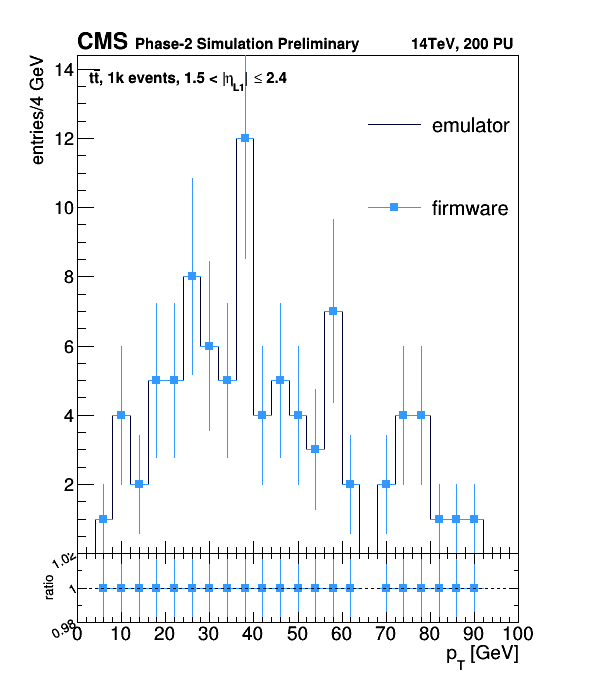

In [53]:

dm = DrawMachine(dpsconfig)

dm.config.legend_position = (0.6,0.55)


hsets, labels, text = hplot.get_histo(histos.EGHistos, ['emu', 'fw'], 'PU200', ['TkEleEE'], ['all'], 'nomatch')

    
for his in hsets:
    hr = his.h_pt
    if hr.GetNbinsX() != 25:
        hr.Rebin(2)


text='t#bar{t}, 1k events, 1.5 < |#eta_{L1}| #leq 2.4'


dm.addHistos([his.h_pt for his in hsets], labels=labels)

dm.addRatioHisto(1,0)

# dm.config.legend_position = (0.4, 0.4)

# dm.config.colors.setPalette(['EllTkEle', 'TkEle'])
def fixture_ratio_axis(histos):
    print(histos[0].GetYaxis().GetTitle())
#     print(histos[0].GetYaxis().GetNlabels())
    histos[0].GetYaxis().ChangeLabel(1,30,-1, -1, -1)
    histos[0].GetYaxis().ChangeLabel(2,30,-1, -1, -1)
    histos[0].GetYaxis().ChangeLabel(3,30,-1, -1, -1)
    histos[0].GetYaxis().SetNdivisions(202,ROOT.kFALSE)

def fixture_axis(histos):
    print(histos[0].GetYaxis().GetTitle())
#     print(histos[0].GetYaxis().GetNlabels())
    histos[0].GetYaxis().ChangeLabel(1,30,0, -1, -1)
#     histos[0].GetYaxis().ChangeLabel(2,30,-1, -1, -1)
#     histos[0].GetYaxis().ChangeLabel(3,30,-1, -1, -1)
#     histos[0].GetYaxis().SetNdivisions(202,ROOT.kFALSE)

    
    
    #   void TAxis::ChangeLabel 	( 	Int_t  	labNum = 0,
# 		Double_t  	labAngle = -1.,
# 		Double_t  	labSize = -1.,
# 		Int_t  	labAlign = -1,
# 		Int_t  	labColor = -1,
# 		Int_t  	labFont = -1,
# 		TString  	labText = "" 
# 	) 		  
    
dm.draw(
    text=text,
#     y_min=1, y_max=1000,
    x_min=0, x_max=100,
#     y_log=True, 
    y_axis_label='entries/4 GeV',
#     y_axis_label='rate [kHz]',
#     h_lines=[9],
    options=['hist', 'P'],
    h_lines_ratio=[1.],
   do_ratio=True,
        y_min_ratio=0.98, y_max_ratio=1.02,
    y_axis_label_ratio='ratio',
    ratio_histos_manipulator = fixture_ratio_axis,
    histos_manipulator=fixture_axis
)

dm.legend.SetTextSize(0.04)

dm.toWeb(name='h_pt_fwemu', page_creator=wc)



ratio
[WebPageCreator]***Warning: overwriting canvas: h_n_fwemu!


Info in <TCanvas::Print>: png file /var/folders/8z/0424tdz97zsc8klvdy6_xl5r0000gn/T/V91-CMSSW12.5-DPS/fwplots/h_n_fwemu.png has been created
Info in <TCanvas::Print>: pdf file /var/folders/8z/0424tdz97zsc8klvdy6_xl5r0000gn/T/V91-CMSSW12.5-DPS/fwplots/h_n_fwemu.pdf has been created


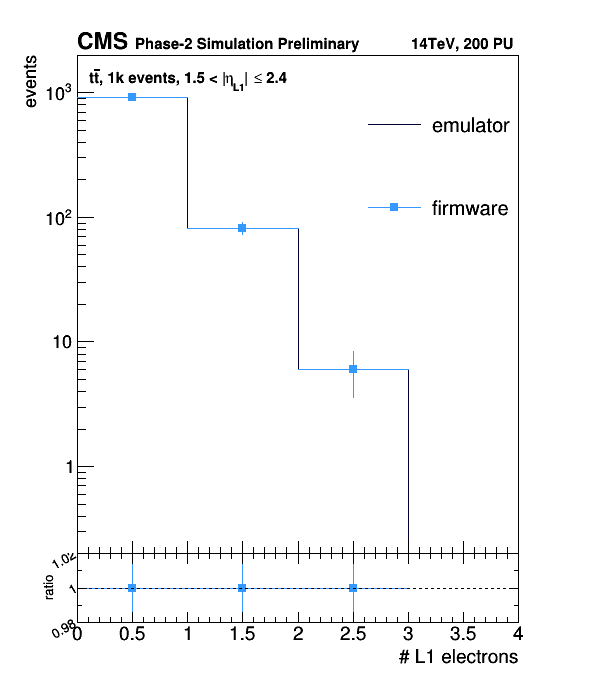

In [52]:

dm = DrawMachine(dpsconfig)

dm.config.legend_position = (0.6,0.55)


hsets, labels, text = hplot.get_histo(histos.EGHistos, ['emu', 'fw'], 'PU200', ['TkEleEE'], ['all'], 'nomatch')

    
# for his in hsets:
#     hr = his.h_pt
#     if hr.GetNbinsX() != 25:
#         hr.Rebin(2)


text='t#bar{t}, 1k events, 1.5 < |#eta_{L1}| #leq 2.4'


dm.addHistos([his.h_n for his in hsets], labels=labels)

dm.addRatioHisto(1,0)

# dm.config.legend_position = (0.4, 0.4)

# dm.config.colors.setPalette(['EllTkEle', 'TkEle'])

dm.draw(
    text=text,
    y_min=0.2, y_max=2000,
    x_min=0, x_max=4,
      y_min_ratio=0.98, y_max_ratio=1.02,
y_axis_label_ratio='ratio',
    y_log=True, 
    y_axis_label='events',
    x_axis_label='# L1 electrons',
#     y_axis_label='rate [kHz]',
#     h_lines=[9],
        h_lines_ratio=[1.],
        options=['hist', 'P'],
  ratio_histos_manipulator = fixture_ratio_axis,
#     histos_manipulator=fixture_axis
   do_ratio=True)

dm.legend.SetTextSize(0.04)


dm.toWeb(name='h_n_fwemu', page_creator=wc)



(0.5, 0.3)
events
ratio
[WebPageCreator]***Warning: overwriting canvas: h_bdt_fwemu!


Info in <TCanvas::Print>: png file /var/folders/8z/0424tdz97zsc8klvdy6_xl5r0000gn/T/V91-CMSSW12.5-DPS/fwplots/h_bdt_fwemu.png has been created
Info in <TCanvas::Print>: pdf file /var/folders/8z/0424tdz97zsc8klvdy6_xl5r0000gn/T/V91-CMSSW12.5-DPS/fwplots/h_bdt_fwemu.pdf has been created


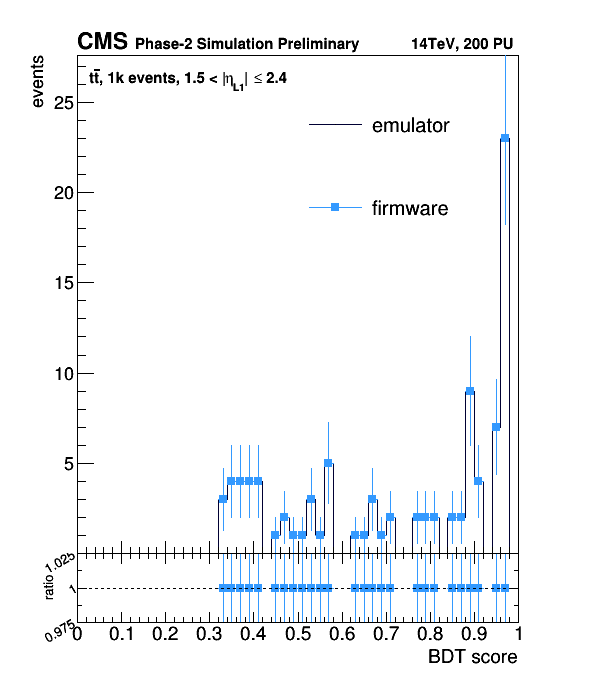

In [50]:

dm = DrawMachine(dpsconfig)

dm.config.legend_position = (0.5,0.55)
print(dm.config.legend_size)
dm.config.legend_size = (0.5,0.3)

hsets, labels, text = hplot.get_histo(histos.EGHistos, ['emu', 'fw'], 'PU200', ['TkEleEE'], ['all'], 'nomatch')

    
for his in hsets:
    hr = his.h_compBdt
    if hr.GetNbinsX() != 50:
        hr.Rebin(2)


text='t#bar{t}, 1k events, 1.5 < |#eta_{L1}| #leq 2.4'


dm.addHistos([his.h_compBdt for his in hsets], labels=labels)

dm.addRatioHisto(1,0)

# dm.config.legend_position = (0.4, 0.4)

# dm.config.colors.setPalette(['EllTkEle', 'TkEle'])

dm.draw(
    text=text,
#     y_min=0.2, y_max=2000,
#     x_min=0, x_max=4,
      y_min_ratio=0.975, y_max_ratio=1.025,
y_axis_label_ratio='ratio',
#     y_log=True, 
    y_axis_label='events',
    x_axis_label='BDT score',
#     y_axis_label='rate [kHz]',
#     h_lines=[9],
        options=['hist', 'P'],
    h_lines_ratio=[1.],
   do_ratio=True,
  ratio_histos_manipulator = fixture_ratio_axis,
    histos_manipulator=fixture_axis)

# 

dm.legend.SetTextSize(0.04)
# ROOT.gStyle.SetLegendTextSize(0)
# dm.canvas.Draw()
dm.toWeb(name='h_bdt_fwemu', page_creator=wc)



In [54]:
wc.publish()

Yes/No: yes
publishing canvas: h_pt_fwemu
publishing canvas: h_n_fwemu
publishing canvas: h_bdt_fwemu


In [ ]:
hsets, labels, text = hplot.get_histo(histos.HistoSetEff, ['ref', 'ele-11.1', 'test'], ['PU200'], ['tkEleEB', 'TkEleEB', 'PFNFtkEleEB'], 'all', 'GEN')            
draw([his.h_den.h_pt for his in hsets], labels, norm=True, text=text)
draw([his.h_den.h_eta for his in hsets], labels, norm=True, text=text, v_lines=[-2.8,-2.4,-1.7,-1.52,2.8,2.4,1.7,1.52])
draw([his.h_den.h_fBrem for his in hsets], labels, norm=True, text=text)
draw([his.h_den.h_reachedEE for his in hsets], labels, norm=True, text=text)


In [ ]:
hsets, labels, text = hplot.get_histo(histos.HistoSetEff, ['ref', 'ele-11.1', 'test'], ['PU200'], ['tkEleEB', 'TkEleEB', 'PFNFtkEleEB'], 'all', 'GEN')            
draw([his.h_num.h_pt for his in hsets], labels, norm=True, text=text)
draw([his.h_num.h_eta for his in hsets], labels, norm=True, text=text, v_lines=[-2.8,-2.4,-1.7,-1.52,2.8,2.4,1.7,1.52])
draw([his.h_num.h_fBrem for his in hsets], labels, norm=True, text=text)
draw([his.h_num.h_reachedEE for his in hsets], labels, norm=True, text=text)


## EG standalone

In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['EgEE', 'PFEgEE', 'PFNFEgEE'], 'EGq5', 'nomatch')            
draw([his.h_pt for his in hsets], labels, norm=True, text=text, options='hist', logy=True)
draw([his.h_eta for his in hsets], labels, logy=True, norm=True, text=text, v_lines=[-3,-2.5,-1.52,1.52,2.5,3], options='hist')


In [ ]:
# %load python/drawingTools.py


In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['PFNFEgEE', 'PFEgEE', 'EgEE'], ['EGq5', 'EGq4',], 'GENEtaBCD')            
print(hsets[0].h_pt.GetName())
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)

for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)

draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.8,-2.4,-1.7,-1.52,2.8,2.4,1.7,1.52])


In [ ]:
TP: tkEmEE
['EGq5' 'EGq5Pt20' 'EGq4Pt20' 'EGq4' 'EGq5Pt30' 'EGq4Pt10' 'EGq5Pt10'
 'EGq4Pt30']
['GENEePt15' 'GENEeEtaBC' 'GENEePt30' 'GENEe']

In [16]:
newconfig=rleg_config
newconfig.marker_size = 1
newconfig.legend_size=(0.5, 0.3)
newconfig.legend_position=(0.3, 0.5)
newconfig.marker_styles.append(10)
dm = DrawMachine(newconfig)

hsets, labels, text = hplot.get_histo(
    histos.EGHistos, 
    ['track-emu bitwise'], 
    ['PU200'], 
    ['tkEleEE'], 
    ['EGq4'], 'GENEePt15', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
dm.addHistos([his.h_tkIso for his in hsets], labels=['sim (TDR) EE'])


# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu bitwise'], 
#     ['PU200'], 
#     ['tkEmEB'], 
#     ['all'], 'GENPt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['sim (TDR) EB'])


# hsets, labels, text = hplot.get_histo(
#     histos.EGHistos, 
#     ['ref'], 
#     ['PU200'], 
#     ['PFNFtkEleEE'], 
#     ['EGq1'], 'GENEePt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_tkIso for his in hsets], labels=['EG emu EE'])


hsets, labels, text = hplot.get_histo(
    histos.EGHistos, 
    ['vertex-emu'], 
    ['PU200'], 
    ['PFNFtkEleEE'], 
    ['EGq1'], 'GENEePt15', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
dm.addHistos([his.h_tkIso for his in hsets], labels=['vertex-emu EE'])

hsets, labels, text = hplot.get_histo(
    histos.EGHistos, 
    ['track-emu'], 
    ['PU200'], 
    ['PFNFtkEleEE'], 
    ['EGq1'], 'GENEePt15', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
dm.addHistos([his.h_tkIso for his in hsets], labels=['track-emu EE'])

hsets, labels, text = hplot.get_histo(
    histos.EGHistos, 
    ['track-emu bitwise'], 
    ['PU200'], 
    ['PFNFtkEleEE'], 
    ['EGq1'], 'GENEePt15', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
dm.addHistos([his.h_tkIso for his in hsets], labels=['track-emu bitwise EE'])


hsets, labels, text = hplot.get_histo(
    histos.EGHistos, 
    ['track-emu bitwise (fix)'], 
    ['PU200'], 
    ['PFNFtkEleEE'], 
    ['EGq1'], 'GENEePt15', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
dm.addHistos([his.h_tkIso for his in hsets], labels=['track-emu bitwise EE (fix)'])



# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['vertex-emu'], 
#     ['PU200'], 
#     ['PFNFtkEmEB'], 
#     ['all'], 'GENPt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['vertex-emu EB'])



# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu'], 
#     ['PU200'], 
#     ['PFNFtkEmEE'], 
#     ['EGq1'], 'GENEePt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['track-emu EE'])

# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu'], 
#     ['PU200'], 
#     ['PFNFtkEmEB'], 
#     ['all'], 'GENPt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['track-emu EB'])



# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu bitwise'], 
#     ['PU200'], 
#     ['PFNFtkEmEE'], 
#     ['EGq1'], 'GENEePt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['track-emu bitwise EE'])

# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu bitwise'], 
#     ['PU200'], 
#     ['PFNFtkEmEB'], 
#     ['all'], 'GENPt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['track-emu bitwise EB'])



# dm.addRatioHisto(0,1)
# dm.addRatioHisto(2,1)
dm.addRatioHisto(3,1)
dm.addRatioHisto(4,1)


dm.draw(text='EG, TkEle, p_{T}^{GEN}>15GeV', 
#         x_min=0., x_max=3.2, 
       y_min=0.5, y_max=1E5, 
#       v_lines=[1.52, 2.4],
       do_ratio=True,
       y_min_ratio=0.8,
       y_max_ratio=1.2,
       y_log=True)
# dm.write(name='eg_TDRvsSummer20_matchig_eff')





0.0 2.0
0.0 2.0
0.0 2.0


In [ ]:
newconfig=rleg_config
newconfig.marker_size = 1
newconfig.legend_size=(0.5, 0.3)
newconfig.legend_position=(0.3, 0.5)
newconfig.marker_styles.append(10)
dm = DrawMachine(newconfig)

hsets, labels, text = hplot.get_histo(
    histos.EGHistos, 
    ['track-emu bitwise'], 
    ['PU200'], 
    ['tkEmEE'], 
    ['EGq4'], 'GENEePt15', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
dm.addHistos([his.h_tkIsoPV for his in hsets], labels=['sim (TDR) EE'])


# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu bitwise'], 
#     ['PU200'], 
#     ['tkEmEB'], 
#     ['all'], 'GENPt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['sim (TDR) EB'])


# hsets, labels, text = hplot.get_histo(
#     histos.EGHistos, 
#     ['ref'], 
#     ['PU200'], 
#     ['PFNFtkEleEE'], 
#     ['EGq1'], 'GENEePt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_tkIso for his in hsets], labels=['EG emu EE'])


hsets, labels, text = hplot.get_histo(
    histos.EGHistos, 
    ['vertex-emu'], 
    ['PU200'], 
    ['PFNFtkEmEE'], 
    ['EGq1'], 'GENEePt15', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
dm.addHistos([his.h_tkIsoPV for his in hsets], labels=['vertex-emu EE'])

hsets, labels, text = hplot.get_histo(
    histos.EGHistos, 
    ['track-emu'], 
    ['PU200'], 
    ['PFNFtkEmEE'], 
    ['EGq1'], 'GENEePt15', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
dm.addHistos([his.h_tkIsoPV for his in hsets], labels=['track-emu EE'])

hsets, labels, text = hplot.get_histo(
    histos.EGHistos, 
    ['track-emu bitwise'], 
    ['PU200'], 
    ['PFNFtkEmEE'], 
    ['EGq1'], 'GENEePt15', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
dm.addHistos([his.h_tkIsoPV for his in hsets], labels=['track-emu bitwise EE'])



# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['vertex-emu'], 
#     ['PU200'], 
#     ['PFNFtkEmEB'], 
#     ['all'], 'GENPt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['vertex-emu EB'])



# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu'], 
#     ['PU200'], 
#     ['PFNFtkEmEE'], 
#     ['EGq1'], 'GENEePt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['track-emu EE'])

# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu'], 
#     ['PU200'], 
#     ['PFNFtkEmEB'], 
#     ['all'], 'GENPt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['track-emu EB'])



# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu bitwise'], 
#     ['PU200'], 
#     ['PFNFtkEmEE'], 
#     ['EGq1'], 'GENEePt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['track-emu bitwise EE'])

# hsets, labels, text = hplot.get_histo(
#     histos.HistoSetEff, 
#     ['track-emu bitwise'], 
#     ['PU200'], 
#     ['PFNFtkEmEB'], 
#     ['all'], 'GENPt15', debug=False)
# # for hset in hsets:
# #     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], labels=['track-emu bitwise EB'])



# dm.addRatioHisto(0,1)
# dm.addRatioHisto(2,1)
# dm.addRatioHisto(3,1)


dm.draw(text='EG, TkEm, p_{T}^{GEN}>15GeV', 
#         x_min=0., x_max=3.2, 
       y_min=0.5, y_max=1E5, 
#       v_lines=[1.52, 2.4],
#        do_ratio=True,
       y_min_ratio=0.8,
       y_max_ratio=1.2,
       y_log=True)
# dm.write(name='eg_TDRvsSummer20_matchig_eff')





In [ ]:
hsets, labels, text = hplot.get_histo(histos.TkEleHistos, 'dele-V11', ['PU200'], ['tkEleEE', 'PFtkEleEE', 'PFNFtkEleEE'], 'EGq5', 'nomatch')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)

draw([his.h_eta for his in hsets], labels, norm=True, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_tkchi2 for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
# draw([his.h_tkz0 for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['tkEleEE', 'PFtkEleEE'], 'EGq5', 'GENEtaBC')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)

draw([his.h_eta for his in hsets], labels, norm=True, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
# draw([his.h_tkchi2 for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
# draw([his.h_tkz0 for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['tkEleEB', 'PFtkEleEB', 'PFNFtkEleEB'], 'LooseTkID', 'GENEtaF')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)

draw([his.h_eta for his in hsets], labels, norm=True, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
# draw([his.h_tkchi2 for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
# draw([his.h_tkz0 for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
hplot.data[(hplot.data['sample'] == 'dele-V11') & (hplot.data.pu == 'PU200') & (hplot.data.tp == 'tkEleEE') & (hplot.data.tp_sel == 'EGq5') & (hplot.data.gen_sel == 'GENEtaBC')]

In [ ]:
hsets, labels, text = hplot.get_histo(histos.TkEmHistos, 'dele-V11', ['PU200'], ['PFtkEmEB', 'tkEmEB'], 'all', 'nomatch')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)
    
draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_tkIsoPV for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIsoPV for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
print (hsets[0].h_eta.GetEntries())
print (hsets[1].h_eta.GetEntries())

In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['PFtkEmEE', 'tkEmEE'], 'EGq5', 'GENEtaBC')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)

draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['PFtkEleEE', 'tkEleEE'], 'EGq5', 'GENEtaBC')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)

draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
newconfig=tdr_config
newconfig.legend_size=(0.5, 0.2)
newconfig.legend_position=(0.4, 0.2)
newconfig.marker_styles.append(10)
dm = DrawMachine(newconfig)
hsets, labels, text = hplot.get_histo(histos.TkEmHistos, 'dele-V11', ['PU200'], ['PFtkEmEB'], 'Pt10', 'nomatch')            
dm.addHistos([his.h_tkIsoPV for his in hsets], ['tkIso (PV)'])

dm.addHistos([his.h_pfIsoPV for his in hsets], ['pfIso (PV)'])
print(hsets[0].h_tkIsoPV.GetBinContent(0))
print(hsets[0].h_pfIsoPV.GetBinContent(-1))

# hsets, labels, text = hplot.get_histo(histos.HistoSetEff, ['dele-NM'], ['PU200'], ['EGALL'], 'Pt25LooseTkID', 'GENPt35', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], ['EG calo-only (CMSSW 11.1)'])


dm.draw(text=text, y_log=True, options='hist')

In [ ]:
newconfig=tdr_config
newconfig.legend_size=(0.5, 0.2)
newconfig.legend_position=(0.4, 0.2)
newconfig.marker_styles.append(10)
dm = DrawMachine(newconfig)
hsets, labels, text = hplot.get_histo(histos.TkEmHistos, 'dele-V11', ['PU200'], ['PFtkEmEB'], 'all', 'nomatch')            
dm.addHistos([his.h_tkIso for his in hsets], ['tkIso'])
dm.addHistos([his.h_pfIso for his in hsets], ['pfIso'])

# hsets, labels, text = hplot.get_histo(histos.HistoSetEff, ['dele-NM'], ['PU200'], ['EGALL'], 'Pt25LooseTkID', 'GENPt35', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], ['EG calo-only (CMSSW 11.1)'])


dm.draw(text=text, y_log=True, options='hist')

In [ ]:
newconfig=tdr_config
newconfig.legend_size=(0.5, 0.2)
newconfig.legend_position=(0.4, 0.2)
newconfig.marker_styles.append(10)
dm = DrawMachine(newconfig)
hsets, labels, text = hplot.get_histo(histos.TkEleHistos, 'dele-V11', ['PU200'], ['PFtkEleEB'], 'Pt10', 'nomatch')            
dm.addHistos([his.h_tkIso for his in hsets], ['tkIso'])
dm.addHistos([his.h_pfIso for his in hsets], ['pfIso'])

# hsets, labels, text = hplot.get_histo(histos.HistoSetEff, ['dele-NM'], ['PU200'], ['EGALL'], 'Pt25LooseTkID', 'GENPt35', debug=False)
# for hset in hsets:
#     hset.computeEff(rebin=2)
# dm.addHistos([his.h_eff.h_abseta.CreateGraph() for his in hsets], ['EG calo-only (CMSSW 11.1)'])


dm.draw(text=text, y_log=True, options='hist')

In [ ]:
hsets, labels, text = hplot.get_histo(histos.TkEleHistos, 'dele-V11', ['PU200'], ['tkEleEB', 'PFtkEleEB'], 'all', 'nomatch')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)

draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['tkEmEE', 'PFtkEmEE'], 'EGq5', 'GENPt15')            
draw([his.h_pt for his in hsets], labels, norm=True, text=text, options='hist', logy=False)
for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)

draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=True, text=text, logy=True, options='hist')
# draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['tkEmEE', 'PFtkEmEE'], 'EGq5Pt10', 'GENEtaBC')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
for his in hsets:
    if his.h_eta.GetNbinsX() == 100:
        his.h_eta.Rebin(2)

draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
# draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['tkEleEE', 'PFtkEleEE'], 'EGq5', 'GENPt15')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
# draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['tkEleEE', 'PFtkEleEE'], 'EGq5', 'GENEtaBC')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
# draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')


In [ ]:
hsets, labels, text = hplot.get_histo(histos.EGHistos, 'dele-V11', ['PU200'], ['tkEmEE', 'PFtkEmEE', 'PFNFtkEmEE'], 'EGq5', 'GENEtaBC')            
draw([his.h_pt for his in hsets], labels, norm=False, text=text, options='hist', logy=False)
draw([his.h_eta for his in hsets], labels, norm=False, text=text, v_lines=[-2.4,-1.7,-1.52,2.4,1.7,1.52])
draw([his.h_tkIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIso for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_tkIsoPV for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
draw([his.h_pfIsoPV for his in hsets], labels, norm=False, text=text, logy=True, options='hist')
